# Caracterização mereológica da área de estudo

Nesta atividade caracterizaremos a metereologia da área de estudo. Avaliaremos os seguintes pontos:

1. Metereologia da superfície
2. Metereologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## Metereologia da superfície
Analisaremos os dados de metar (estação mereológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR. \ 
Os dados coletados são do município de Florianópolis, deivido ao fato de ser o local de medição mais próximo da industria ArcellorMittal Vega, localizada em São Franscisco do Sul.
Os dados estarão na pasta de inputs/meteoSuperficie com a menclatura metar.csv

In [1]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Dell\OneDrive\Documentos\GitHub\Polatm_RamonVieira
C:\Users\Dell\OneDrive\Documentos\GitHub\Polatm_RamonVieira\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [2]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws       hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.40  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.40  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.40  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.40  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.40  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...      ...  ...  ...   
9497   31      1  2024    19 NaN  120.0  6.687772  2011.68  3.0  3.0   
9498   31      1  2024    20 NaN  130.0  6.173328  2011.68  3.0  3.0   
9499   31      1  2024    21 NaN  140.0  5.658884  2011.68  6.0  3.0   
9500   31      1  2024    22 NaN  150.0  4.115552  2011.68  3.0  3.0   
9501   31      1  2024    23 NaN  140.0  3.601108  2438.40  3.0  3.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  

In [3]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
9497   2024-01-31 19:00:00
9498   2024-01-31 20:00:00
9499   2024-01-31 21:00:00
9500   2024-01-31 22:00:00
9501   2024-01-31 23:00:00
Name: datetime, Length: 54756, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.40,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.40,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.40,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.40,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.40,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31 19:00:00,31,1,2024,19,NaN,120.0,6.687772,2011.68,3.0,3.0,1009.665616,28.0,22.0,NaN,0.0,69.90,2024-01-31 19:00:00
2024-01-31 20:00:00,31,1,2024,20,NaN,130.0,6.173328,2011.68,3.0,3.0,1009.665616,27.0,21.0,NaN,0.0,69.71,2024-01-31 20:00:00
2024-01-31 21:00:00,31,1,2024,21,NaN,140.0,5.658884,2011.68,6.0,3.0,1009.662022,27.0,21.0,NaN,0.0,69.71,2024-01-31 21:00:00


## Etapa 1
Analise da condição meteorológica de superfície (estação meteorológica). Avalie as condições meteorológicas no ano de 2023 e elabore figuras da série temporal bruta e remova os dados discrepantes. Elabore também figuras tipo boxplot e com médias mensais. No gráfico das médias mensais, desenhem a média como uma linha sólida e uma sombra que determine as mínimas e máximas mensais. Use o seguinte pacote para desenhar a sombra: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html. As seguintes condições meteorológicas devem ser analisadas: temperatura, umidade, pressão, cobertura de nuvens. velocidade e direção do vento. Para analisar o vento, elabore a rosa dos ventos. No seu relatório, deve conter uma discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

O percentil 99 da temperatura é: 31.0
O percentil 99 da pressão é: 1009.6967607391396
O percentil 99 da umidade relativa é: 100.0
O percentil 99 da cobertura de nuvens é: 8.0
O percentil 99 da velocidade do vento é: 8.745548
O percentil 99 da direção do vento é: 360.0


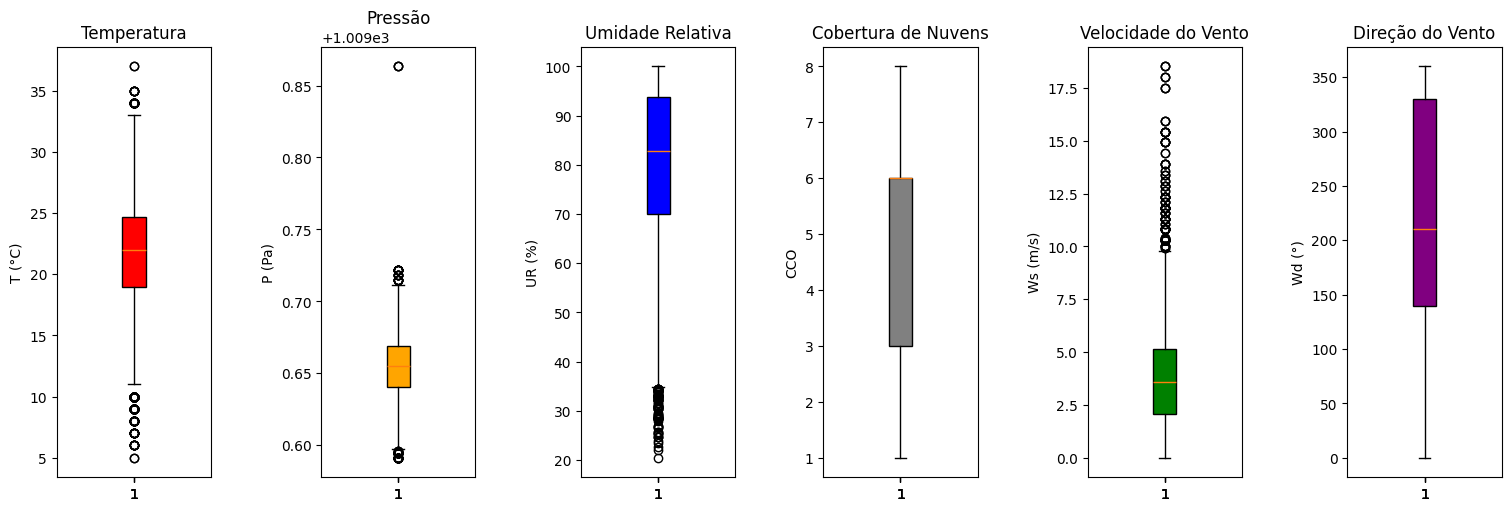

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Fazendo boxplot das variáveis
fig, ax = plt.subplots(1, 6, sharex=True, figsize=(15, 5), constrained_layout=True, 
                       gridspec_kw={'wspace': 0.2})  # Evitando sobreposições

# Lista dos nomes para os eixos y
nomes_eixos_y = ['T (°C)', 'P (Pa)', 'UR (%)', 'CCO', 'Ws (m/s)', 'Wd (°)']

# Formatando os gráficos
boxplot_temp = ax[0].boxplot(metSuperficie['temp'], patch_artist=True)
ax[0].set_title('Temperatura')
ax[0].set_ylabel(nomes_eixos_y[0])  # Adicionando título no eixo y
for patch in boxplot_temp['boxes']:
    patch.set_facecolor('red')

boxplot_p = ax[1].boxplot(metSuperficie['p'], patch_artist=True)
ax[1].set_title('Pressão')
ax[1].set_ylabel(nomes_eixos_y[1])  # Adicionando título no eixo y
for patch in boxplot_p['boxes']:
    patch.set_facecolor('orange')

boxplot_relh = ax[2].boxplot(metSuperficie['relh'], patch_artist=True)
ax[2].set_title('Umidade Relativa')
ax[2].set_ylabel(nomes_eixos_y[2])  # Adicionando título no eixo y
for patch in boxplot_relh['boxes']:
    patch.set_facecolor('blue')

# Tratando valores NaN para cobertura de nuvens (cco)
cco_validos = metSuperficie['cco'].dropna()
boxplot_cco = ax[3].boxplot(cco_validos, patch_artist=True)
ax[3].set_title('Cobertura de Nuvens')
ax[3].set_ylabel(nomes_eixos_y[3])  # Adicionando título no eixo y
for patch in boxplot_cco['boxes']:
    patch.set_facecolor('gray')

boxplot_ws = ax[4].boxplot(metSuperficie['ws'], patch_artist=True)
ax[4].set_title('Velocidade do Vento')
ax[4].set_ylabel(nomes_eixos_y[4])  # Adicionando título no eixo y
for patch in boxplot_ws['boxes']:
    patch.set_facecolor('green')

# Tratando valores NaN para inclinação do vento (wd)
wd_validos = metSuperficie['wd'].dropna()
boxplot_wd = ax[5].boxplot(wd_validos, patch_artist=True)
ax[5].set_title('Direção do Vento')
ax[5].set_ylabel(nomes_eixos_y[5])  # Adicionando título no eixo y
for patch in boxplot_wd['boxes']:
    patch.set_facecolor('purple')

# Removendo valores acima do percentil 99°
temp99 = np.percentile(metSuperficie['temp'], 99)
p99 = np.percentile(metSuperficie['p'], 99)
relh99 = np.percentile(metSuperficie['relh'], 99)
cco99 = np.nanpercentile(cco_validos, 99)  # Usando apenas valores válidos de cco
ws99 = np.nanpercentile(metSuperficie['ws'], 99)
wd99 = np.nanpercentile(wd_validos, 99)  # Usando apenas valores válidos de wd

print('O percentil 99 da temperatura é:', temp99)
print('O percentil 99 da pressão é:', p99)
print('O percentil 99 da umidade relativa é:', relh99)
print('O percentil 99 da cobertura de nuvens é:', cco99)
print('O percentil 99 da velocidade do vento é:', ws99)
print('O percentil 99 da direção do vento é:', wd99)

In [10]:
# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('MS').mean()
min_mensal = metSuperficie.resample('MS').min()
max_mensal = metSuperficie.resample('MS').max()

# Títulos dos DataFrames
titulos = ["Média Mensal", "Mínimo Mensal", "Máximo Mensal"]

# DataFrames e seus respectivos títulos
dataframes = [media_mensal, min_mensal, max_mensal]
dataframes_com_titulos = dict(zip(titulos, dataframes))

# Mostrar as estatísticas
for titulo, dataframe in dataframes_com_titulos.items():
    print(f"\n{titulo}\n")
    display(dataframe)

KeyError: "None of ['datetime'] are in the columns"

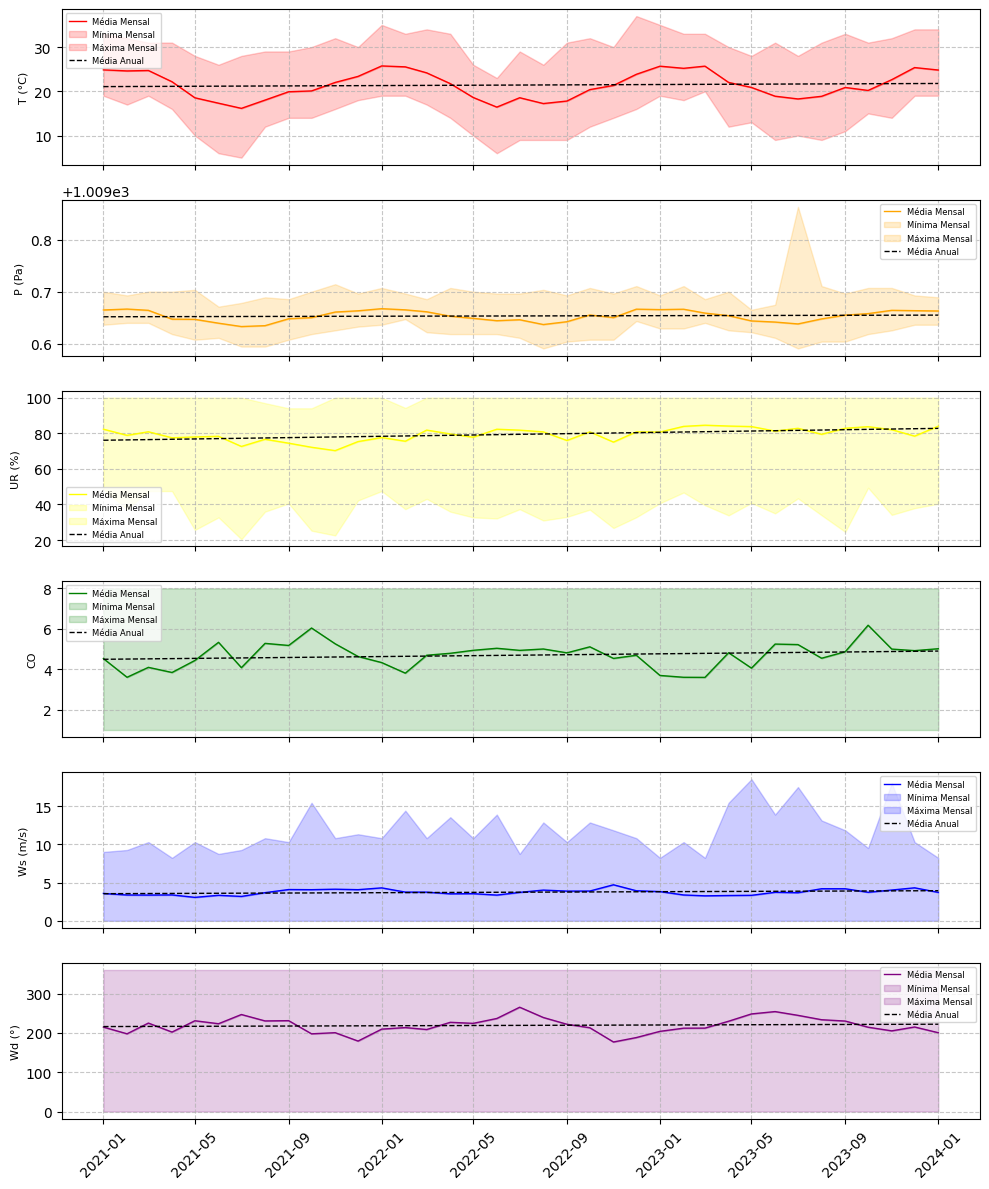

In [11]:
# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

# Lista de variáveis e cores correspondentes
variaveis_cores = [('temp', 'red'), ('p', 'orange'), ('relh', 'yellow'), ('cco', 'green'), ('ws', 'blue'), ('wd', 'purple')]

# Lista dos nomes para os eixos y
nomes_eixos_y = ['T (°C)', 'P (Pa)', 'UR (%)', 'CO', 'Ws (m/s)', 'Wd (°)']

# Plotando cada variável
for i, (variavel, cor) in enumerate(variaveis_cores):
    ax[i].plot(media_mensal.index, media_mensal[variavel], color=cor, label='Média Mensal', linewidth=1)
    ax[i].fill_between(media_mensal.index, min_mensal[variavel], media_mensal[variavel], color=cor, alpha=0.2, label='Mínima Mensal')
    ax[i].fill_between(media_mensal.index, media_mensal[variavel], max_mensal[variavel], color=cor, alpha=0.2, label='Máxima Mensal')
    
    # Adicionando a média anual
    z = np.polyfit(media_mensal.index.to_julian_date(), media_mensal[variavel], 1)
    p = np.poly1d(z)
    ax[i].plot(media_mensal.index, p(media_mensal.index.to_julian_date()), color='black', linestyle='--', label='Média Anual', linewidth=1)
    
    ax[i].set_ylabel(nomes_eixos_y[i], fontsize=8)  # Usando os nomes da lista para os eixos y
    ax[i].legend(fontsize=6)
    ax[i].grid(True, linestyle='--', alpha=0.7)

# Rotacionar os rótulos do eixo x
ax[-1].tick_params(axis='x', rotation=45)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

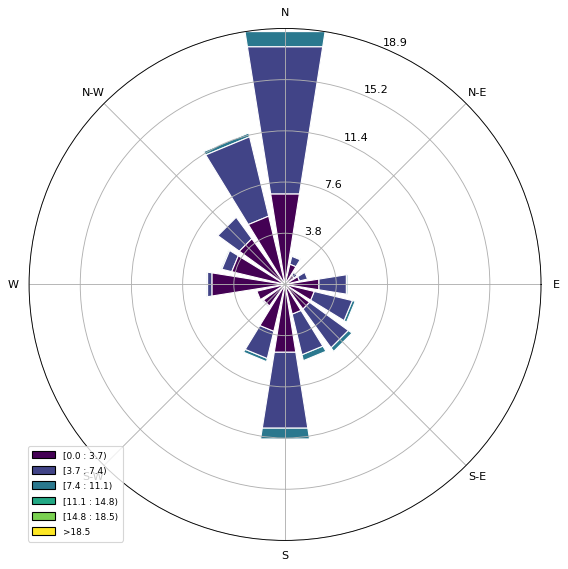

In [12]:
# Criando minha rosa dos ventos para avaliar a direção do vento
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

## Etapa 2
Análise do perfil de temperatura. Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python. Analise os dados de 0 e 12 horas durante10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

# Análise upperair/sondagem/perfil da atmosfera

Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [68]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Função para gerar datas aleatórias em um intervalo de dias
def random_dates(start_date, end_date, n):
    delta = end_date - start_date
    return [start_date + timedelta(days=random.randint(0, delta.days)) for _ in range(n)]

# Definindo intervalos para verão e inverno
# Verão no Hemisfério Sul (21 de dezembro a 20 de março)
summer_start = datetime(2023, 12, 21)
summer_end = datetime(2024, 3, 20)

# Inverno no Hemisfério Sul (21 de junho a 20 de setembro)
winter_start = datetime(2023, 6, 21)
winter_end = datetime(2023, 9, 20)

# Gerando 5 datas aleatórias para verão e inverno
summer_dates = random_dates(summer_start, summer_end, 5)
winter_dates = random_dates(winter_start, winter_end, 5)

# Estação de análise
station = 'SBFL'

# Função para extrair dados para uma lista de datas
def extract_data(dates, times, station):
    data = {}
    for date in dates:
        for time in times:
            datetime_obj = datetime(date.year, date.month, date.day, time)
            attempt_date = datetime_obj
            df = None
            # Tentar até encontrar dados para a data próxima disponível
            while df is None:
                try:
                    df = WyomingUpperAir.request_data(attempt_date, station)
                    data[attempt_date] = df
                except Exception as e:
                    print(f"Falha ao obter dados para {attempt_date}: {e}")
                    # Avança um dia para a próxima tentativa
                    attempt_date += timedelta(days=1)
    return data

# Horários de interesse (00h e 12h)
times = [0, 12]

# Extraindo dados
summer_data = extract_data(summer_dates, times, station)
winter_data = extract_data(winter_dates, times, station)

print(summer_data)
print(winter_data)

Falha ao obter dados para 2024-02-23 12:00:00: Error accessing http://weather.uwyo.edu/cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2024&MONTH=02&FROM=2312&TO=2312&STNM=SBFL
Server Error (503: Sorry, the server is too busy to process your request.
Please try again later.
)
Falha ao obter dados para 2024-02-24 12:00:00: Error accessing http://weather.uwyo.edu/cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2024&MONTH=02&FROM=2412&TO=2412&STNM=SBFL
Server Error (503: Sorry, the server is too busy to process your request.
Please try again later.
)
Falha ao obter dados para 2024-01-13 12:00:00: No data available for 2024-01-13 12Z for station SBFL.
Falha ao obter dados para 2024-01-14 12:00:00: No data available for 2024-01-14 12Z for station SBFL.
{datetime.datetime(2024, 3, 16, 0, 0):     pressure   height  temperature  dewpoint  direction  speed        u_wind  \
0     1010.0      5.0         25.0      20.3        110      8 -7.517541e+00   
1     1000.0     91.0         2


Analisando dados para 2024-03-16 00:00:00 (Verão)

Inversões de temperatura em 2024-03-16 00:00:00: [(260.0, 26.8), (8770.0, -22.3), (8834.0, -22.1), (9364.0, -27.1), (9432.0, -26.3), (17398.0, -85.3), (18033.0, -80.9), (19107.0, -72.5), (19587.0, -73.5), (20493.0, -66.9), (20740.0, -67.7), (22331.0, -62.7), (22642.0, -63.9)]


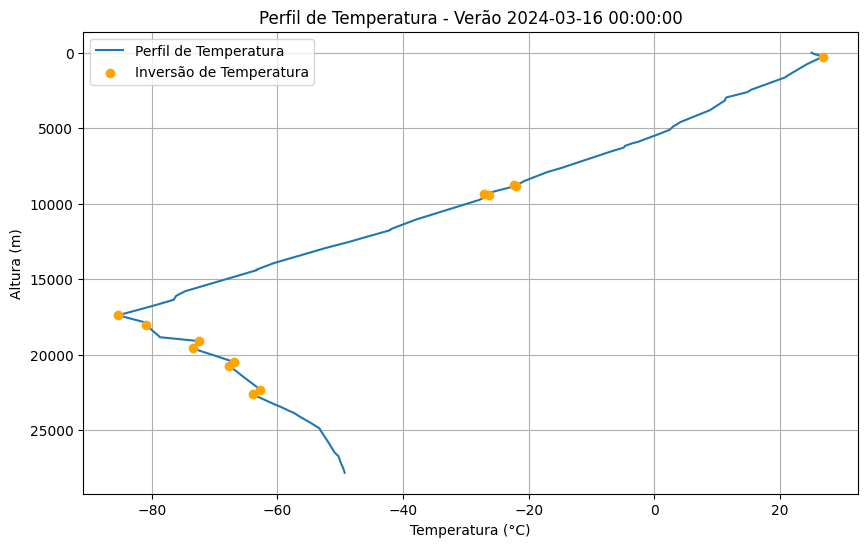

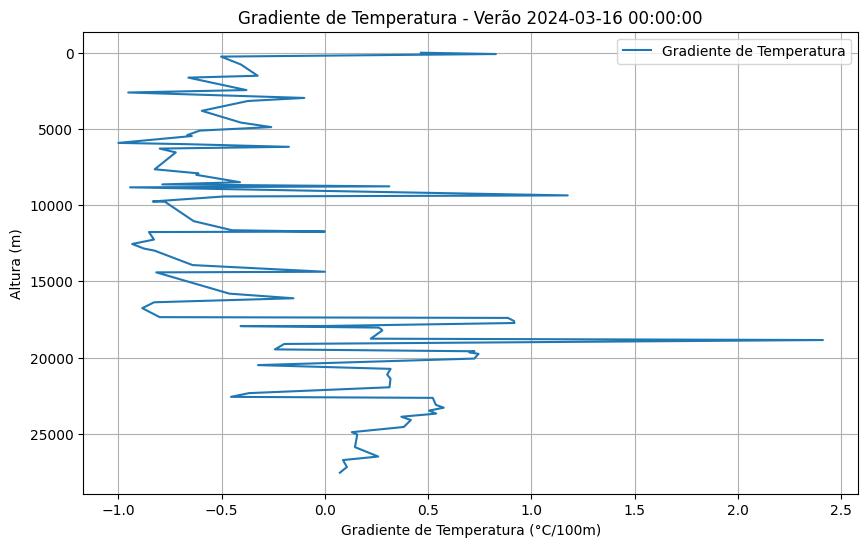


Analisando dados para 2024-03-16 12:00:00 (Verão)

Inversões de temperatura em 2024-03-16 12:00:00: [(380, 25.0), (994, 25.6), (4765, 3.4), (18126, -77.3), (23411, -56.5)]


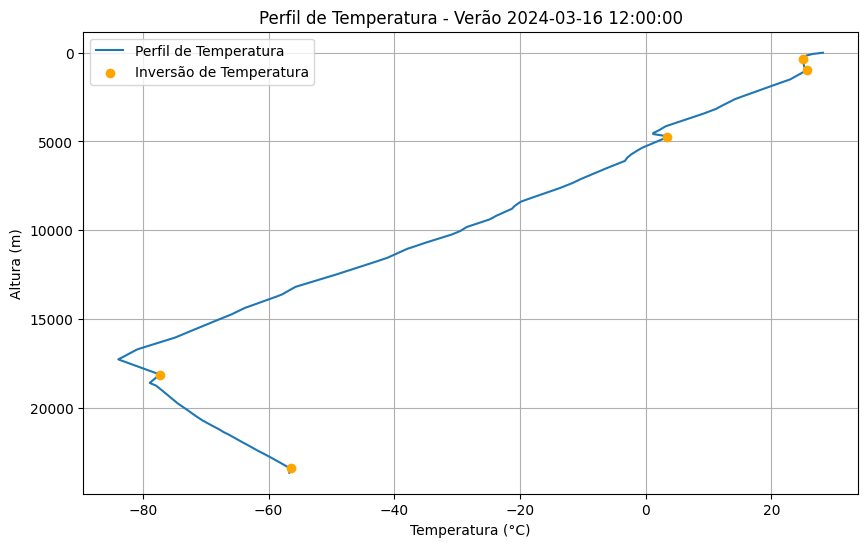

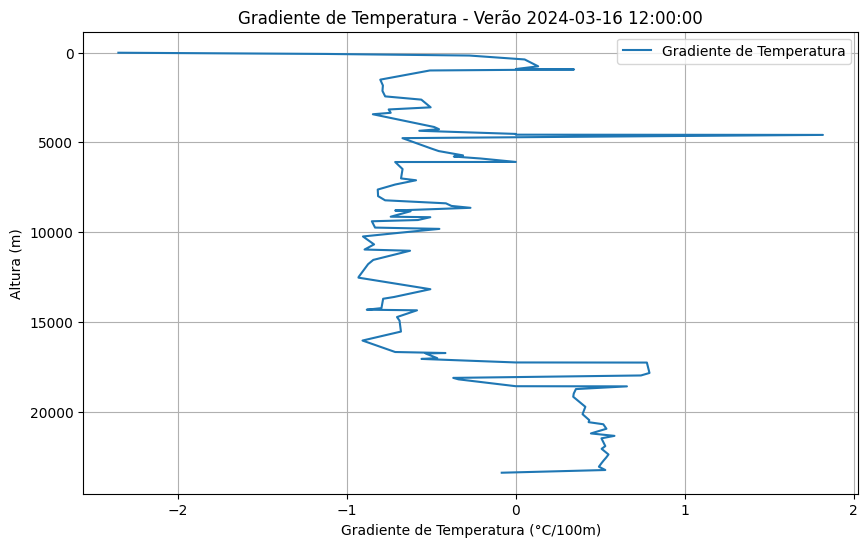


Analisando dados para 2024-02-23 00:00:00 (Verão)

Inversões de temperatura em 2024-02-23 00:00:00: [(4972.0, -3.1), (5101.0, -1.9), (18391.0, -73.3)]


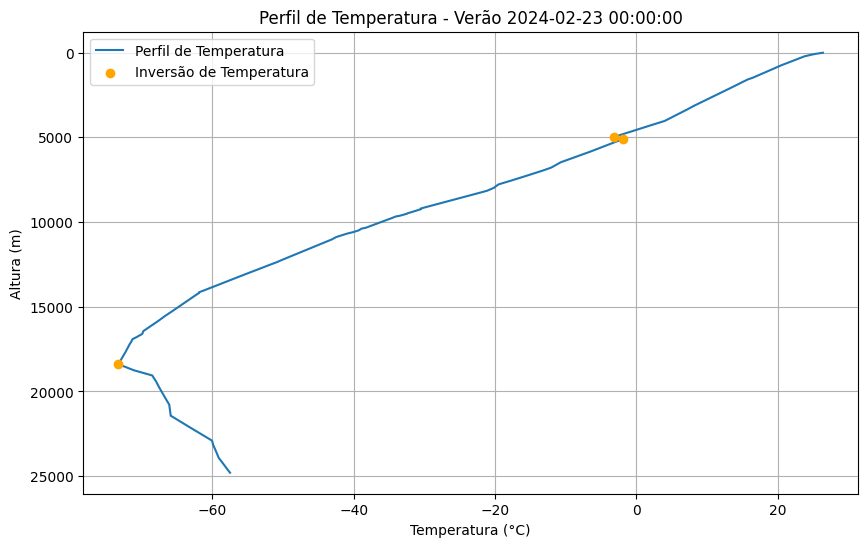

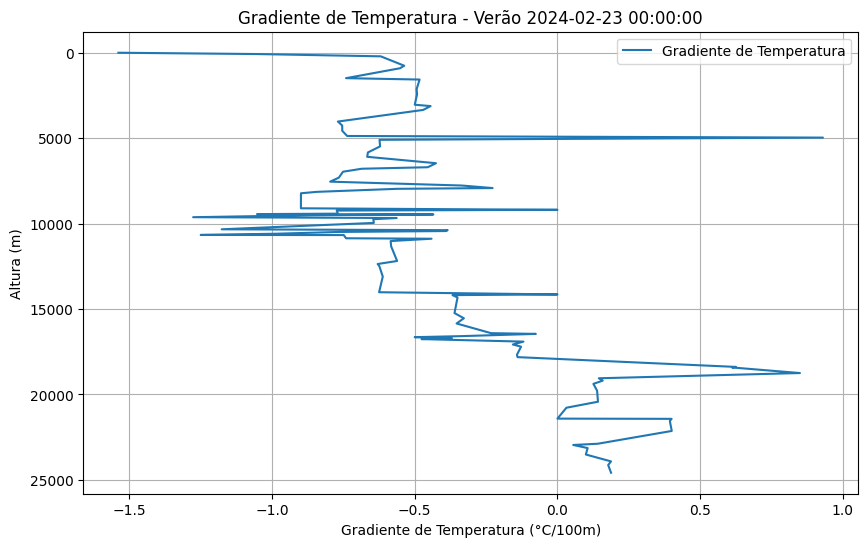


Analisando dados para 2024-02-25 12:00:00 (Verão)

Inversões de temperatura em 2024-02-25 12:00:00: [(5578, -3.7), (5747, -2.9), (7446, -14.1), (7576, -12.9), (15841, -73.9), (16960, -75.9), (18018, -79.1), (19100, -74.3), (23870, -58.1), (24062, -58.9), (25917, -50.9), (26480, -51.5), (27093, -50.5), (27652, -52.3)]


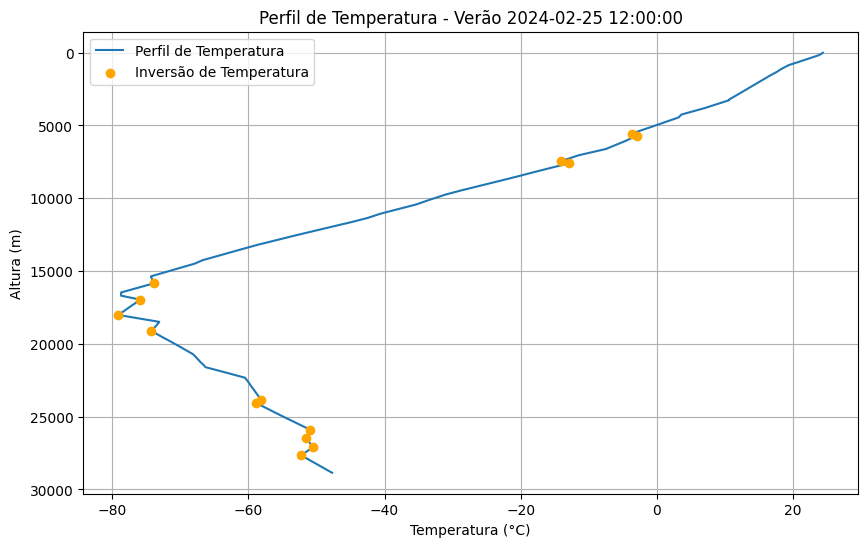

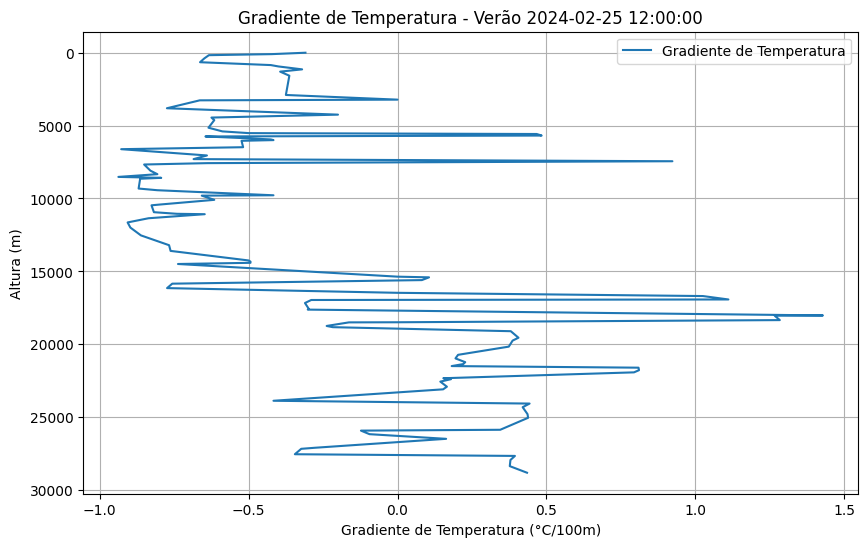


Analisando dados para 2024-03-05 00:00:00 (Verão)

Inversões de temperatura em 2024-03-05 00:00:00: [(17743, -79.9), (18147, -75.3), (18496, -76.5), (19471, -70.5), (19569, -70.9), (20132, -65.1), (20746, -67.3), (23807, -56.3), (23870, -56.5)]


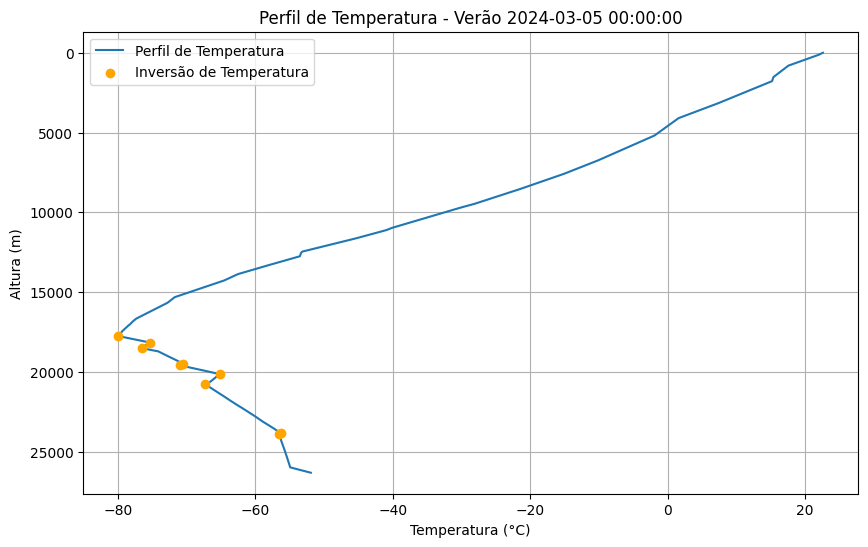

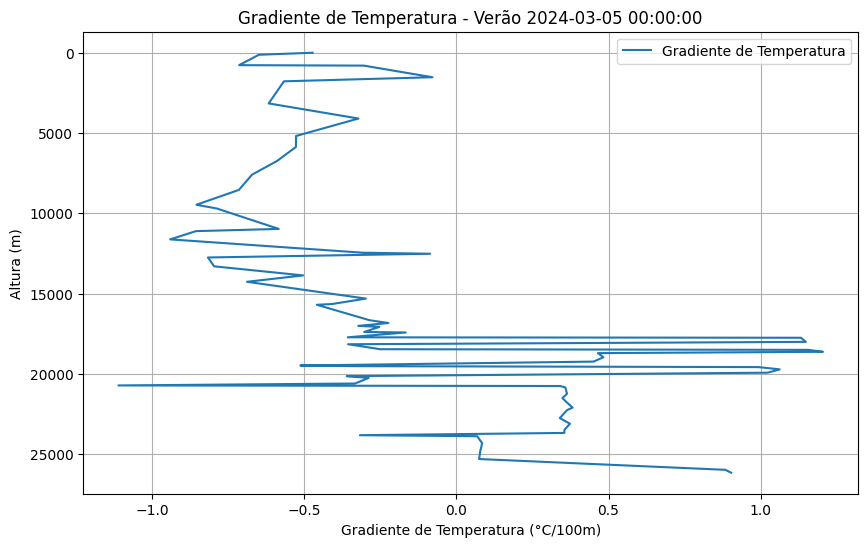


Analisando dados para 2024-03-05 12:00:00 (Verão)

Inversões de temperatura em 2024-03-05 12:00:00: [(1474.0, 14.4), (1655.0, 14.8), (5466.0, -5.1), (5572.0, -4.7), (16049.0, -76.7), (17308.0, -78.3), (18097.0, -71.3), (18530.0, -73.7), (26249.0, -50.9), (26772.0, -52.5)]


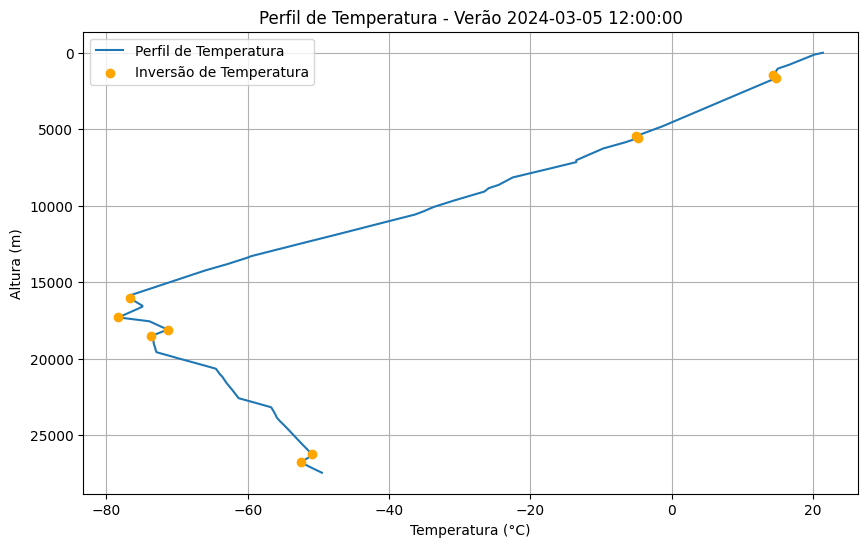

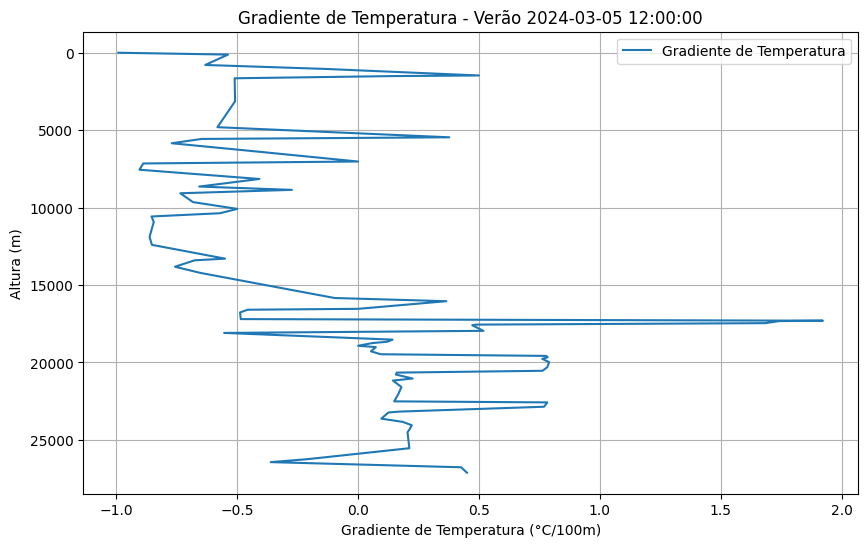


Analisando dados para 2024-01-13 00:00:00 (Verão)

Inversões de temperatura em 2024-01-13 00:00:00: [(1897, 11.4), (2085, 12.4), (4037, 3.8), (4089, 4.4), (4233, 3.2), (4326, 4.0), (4963, -0.5), (5049, 0.2), (13921, -63.1), (14118, -62.5), (16660, -78.3), (16994, -79.1), (19247, -72.3), (20589, -66.3), (21435, -68.1), (22729, -56.7), (23165, -58.1), (25063, -54.3), (26460, -55.1)]


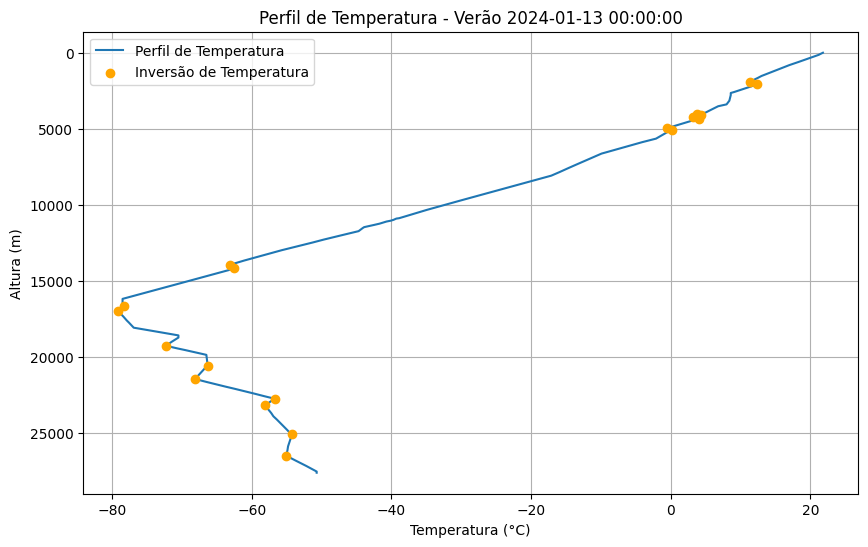

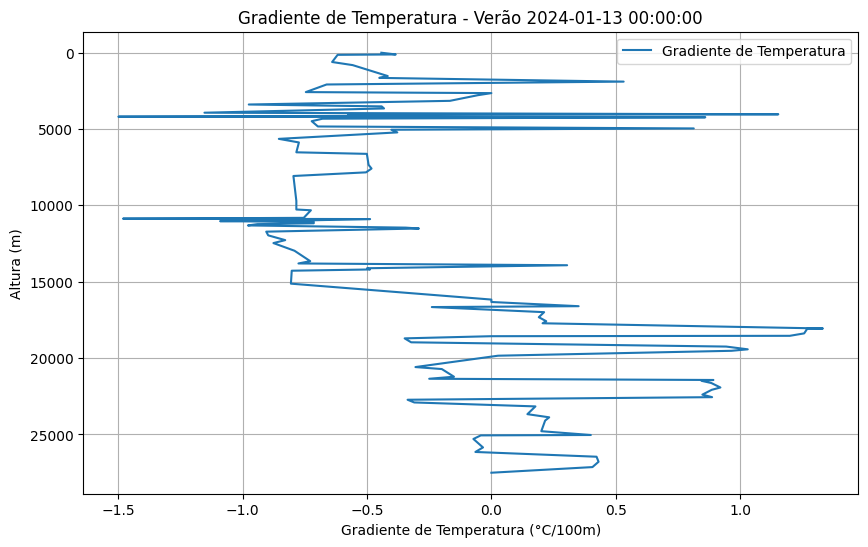


Analisando dados para 2024-01-15 12:00:00 (Verão)

Inversões de temperatura em 2024-01-15 12:00:00: [(208.0, 25.0), (499.0, 26.4), (4683.0, -0.3), (4794.0, 0.0), (5370.0, -3.5), (5535.0, -2.5), (7886.0, -16.1), (15443.0, -71.7), (17325.0, -78.7), (18379.0, -73.3), (18955.0, -75.7), (22828.0, -60.1), (23361.0, -61.5), (25246.0, -56.9)]


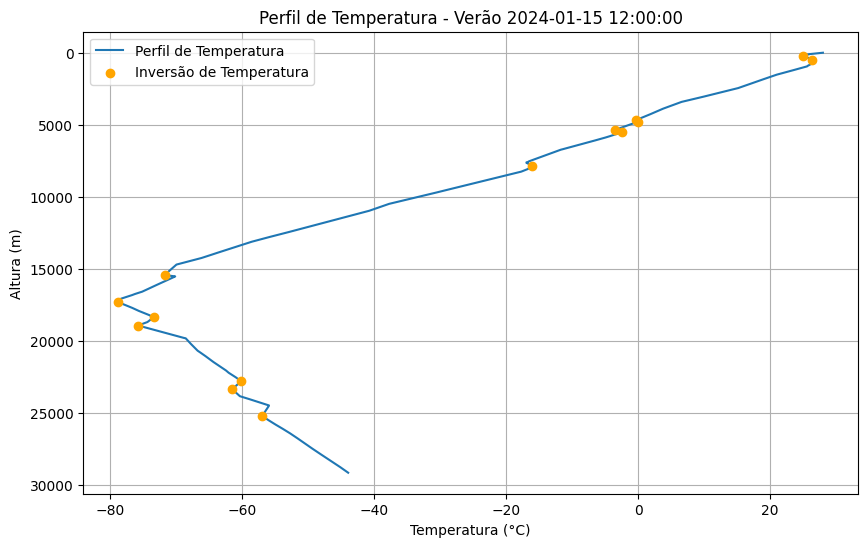

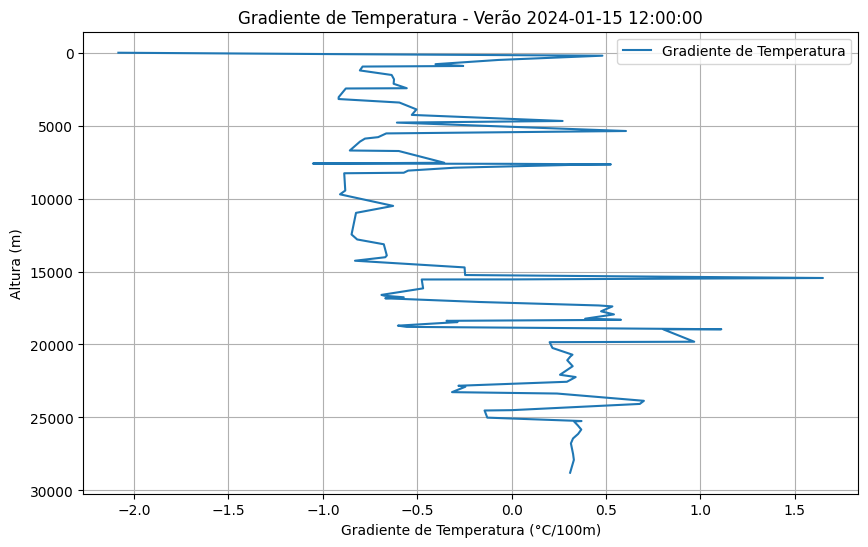


Analisando dados para 2024-01-01 00:00:00 (Verão)

Inversões de temperatura em 2024-01-01 00:00:00: [(2219, 8.4), (2402, 9.8), (3052, 5.8), (3110, 6.6), (16143, -74.9), (16532, -73.7), (16590, -73.9), (17054, -71.7), (18508, -77.3), (18670, -76.1)]


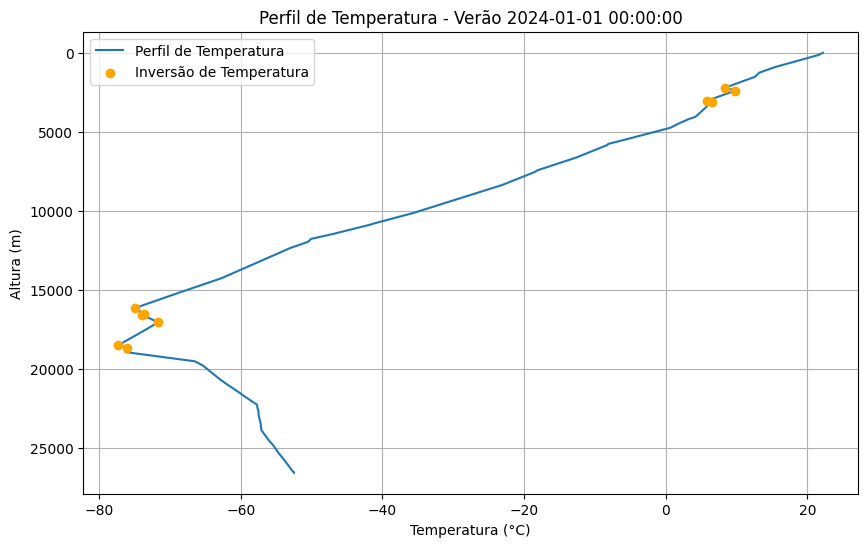

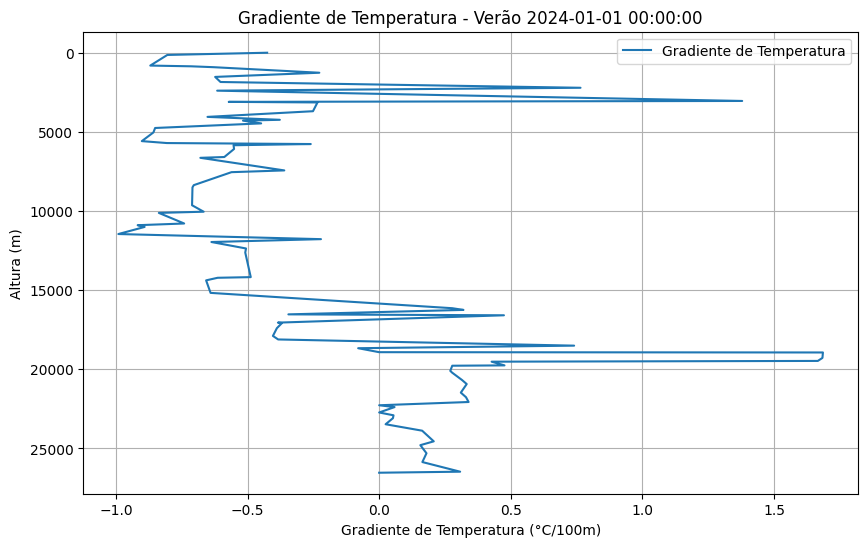


Analisando dados para 2024-01-01 12:00:00 (Verão)

Inversões de temperatura em 2024-01-01 12:00:00: [(16617.0, -75.3), (17465.0, -71.9), (18052.0, -76.1), (19790.0, -66.1), (20123.0, -67.5)]


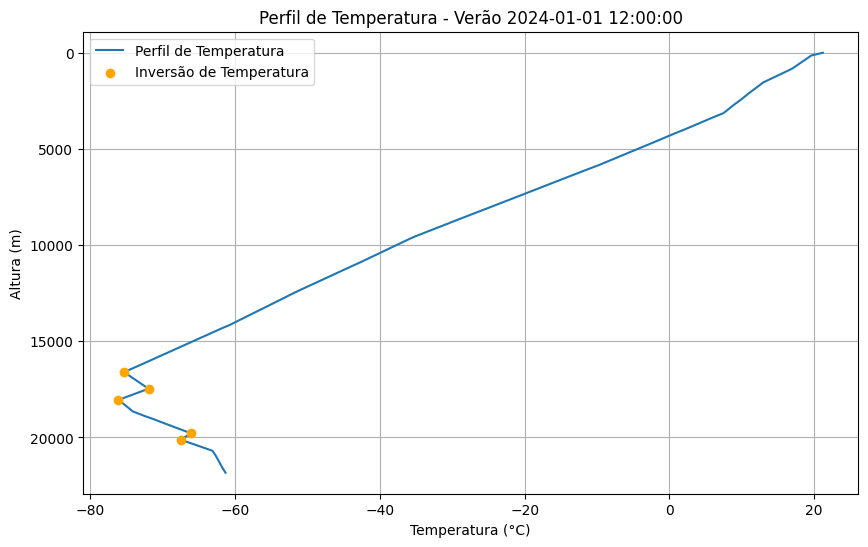

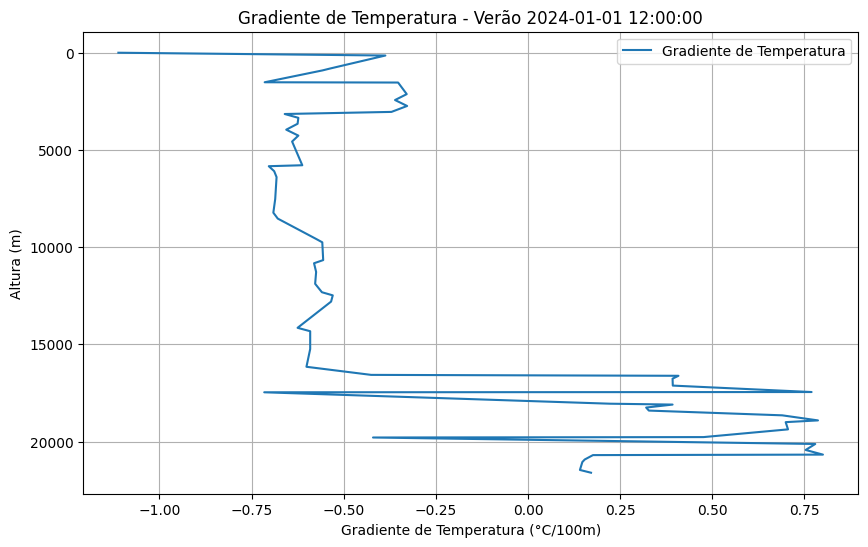


Analisando dados para 2023-08-20 00:00:00 (Inverno)

Inversões de temperatura em 2023-08-20 00:00:00: [(2007, 6.2), (2184, 6.8), (3132, 0.8), (3308, 1.6), (9253, -44.7), (9411, -39.7), (10314, -46.1), (10550, -45.7), (12685, -57.1), (13681, -52.9), (16193, -68.3), (16770, -63.3), (17435, -66.9), (17679, -62.3), (18250, -66.1), (19357, -59.9), (19713, -61.3), (20438, -56.9), (20650, -57.3)]


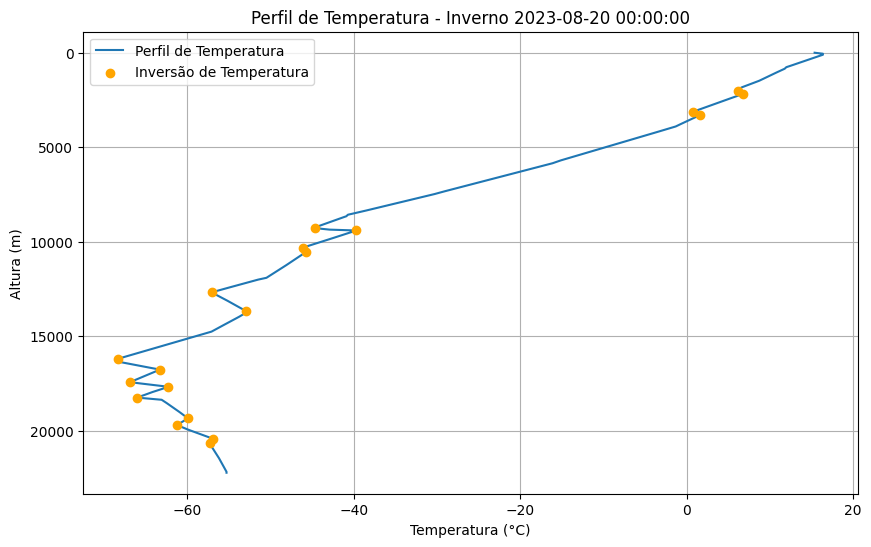

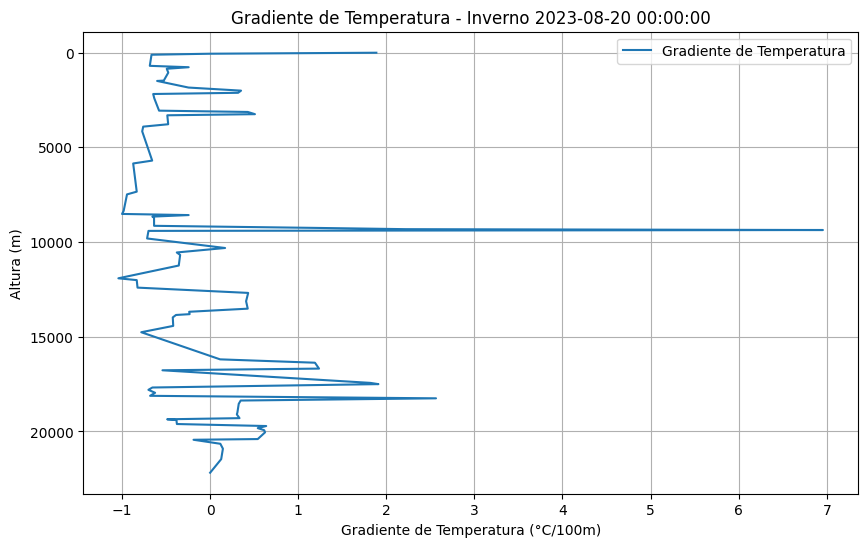


Analisando dados para 2023-08-20 12:00:00 (Inverno)

Inversões de temperatura em 2023-08-20 12:00:00: [(1010, 11.8), (1444, 16.0), (5665, -17.7), (9442, -46.5), (9836, -45.5), (14158, -63.3), (14709, -57.7), (16330, -65.5), (17327, -59.7), (18634, -66.9), (19395, -61.5), (19570, -62.5), (20053, -56.9), (20929, -58.9), (22015, -55.1), (22991, -56.9)]


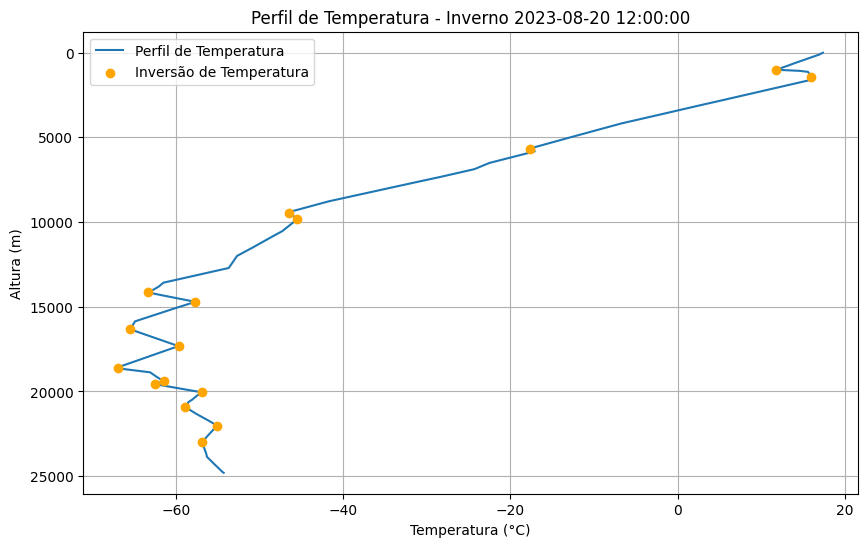

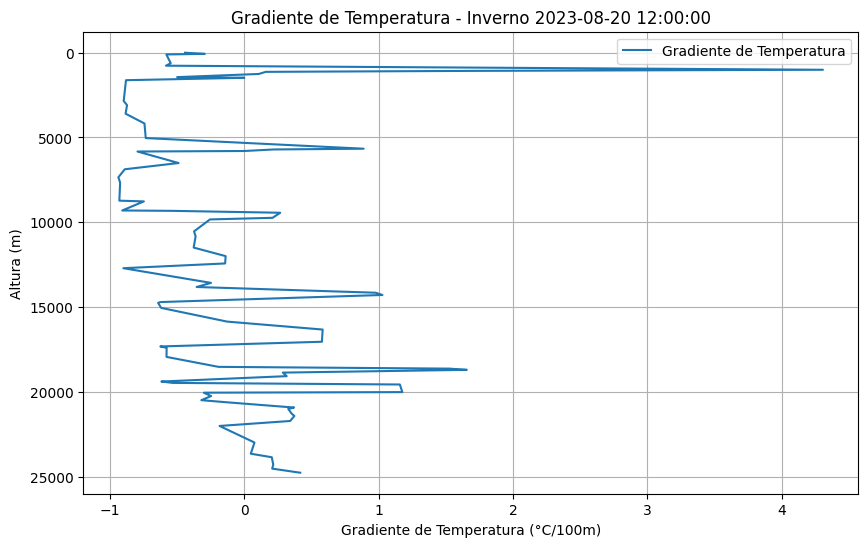


Analisando dados para 2023-08-21 00:00:00 (Inverno)

Inversões de temperatura em 2023-08-21 00:00:00: [(58, 20.0), (268, 18.2), (330, 19.8), (1155, 16.6), (1223, 17.2), (4262, -4.1), (9549, -46.7), (9663, -45.3), (10834, -52.5), (11733, -49.3), (14705, -61.5), (15098, -58.7), (16437, -68.3), (16937, -63.3), (18053, -69.1), (19492, -56.5), (20324, -62.1), (22495, -55.3)]


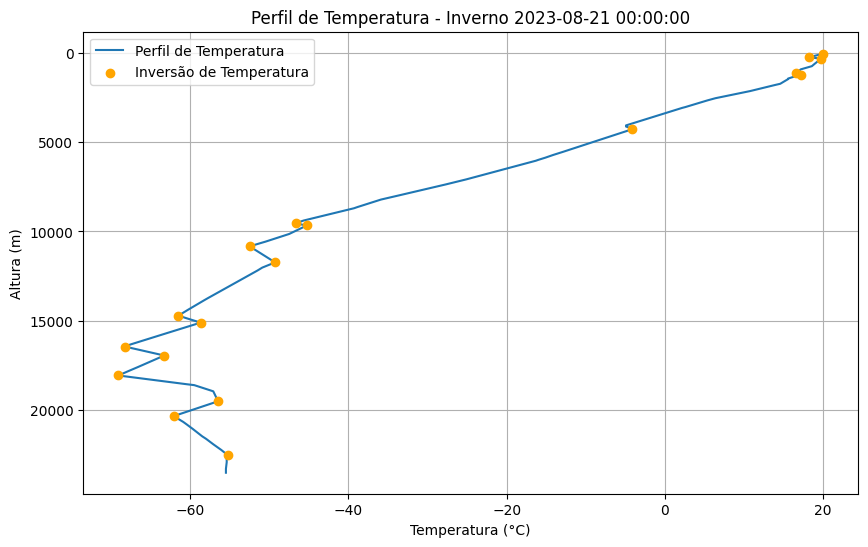

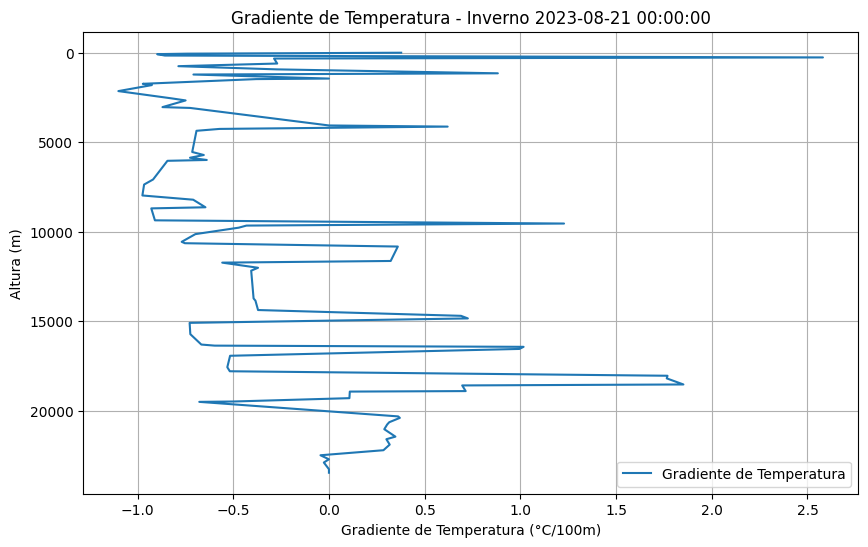


Analisando dados para 2023-08-21 12:00:00 (Inverno)

Inversões de temperatura em 2023-08-21 12:00:00: [(208.0, 16.4), (481.0, 19.4), (4441.0, -5.3), (4521.0, -4.9), (10990.0, -51.9), (11631.0, -50.7), (14725.0, -59.1), (14871.0, -57.9), (16589.0, -69.5), (17300.0, -65.1), (17934.0, -68.7), (18655.0, -60.3), (19422.0, -63.7), (21951.0, -56.7), (22554.0, -59.5)]


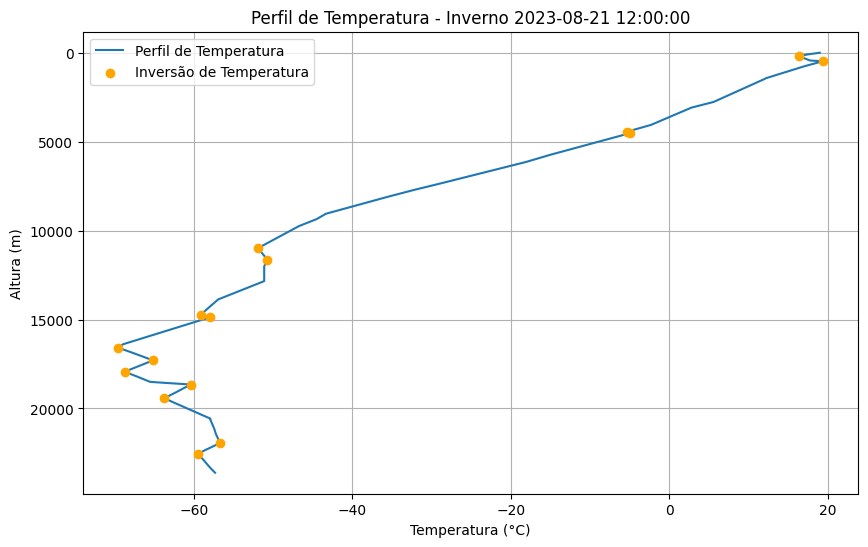

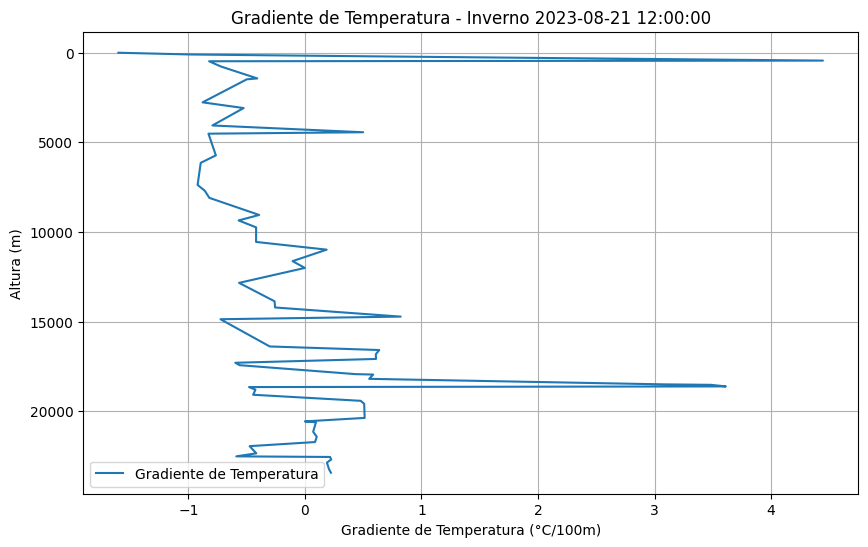


Analisando dados para 2023-08-25 00:00:00 (Inverno)

Inversões de temperatura em 2023-08-25 00:00:00: [(135.0, 15.0), (1624.0, 8.6), (1815.0, 10.6), (5699.0, -11.3), (5760.0, -10.9), (16228.0, -73.1), (16401.0, -70.3), (17009.0, -73.5), (17412.0, -68.9), (18680.0, -73.3)]


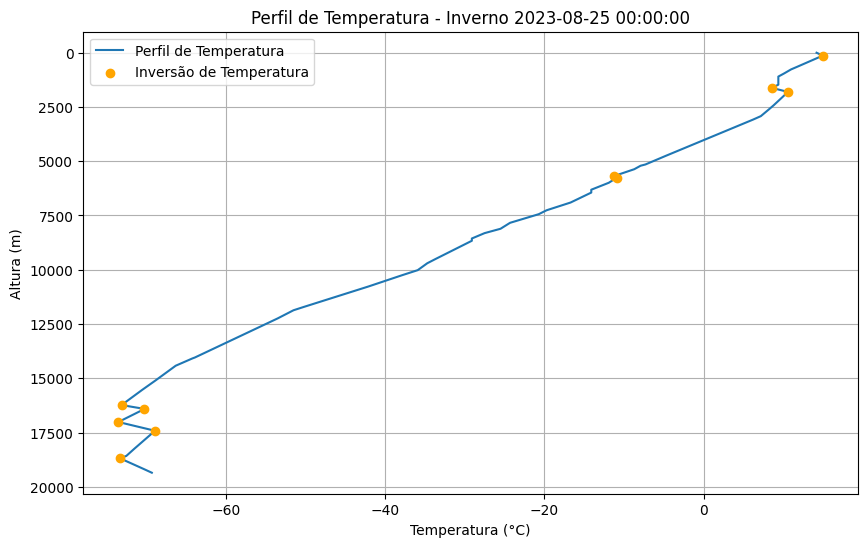

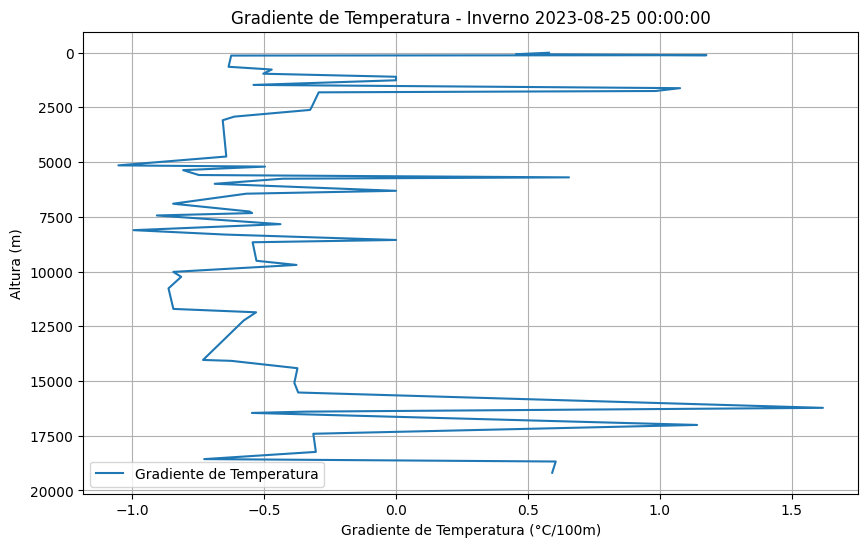


Analisando dados para 2023-08-25 12:00:00 (Inverno)

Inversões de temperatura em 2023-08-25 12:00:00: [(1569, 5.4), (1816, 6.0), (2009, 4.6), (2197, 8.8), (7437, -25.1), (8108, -23.9), (17748, -74.7), (18358, -69.9), (18729, -72.3), (18906, -68.3), (19241, -70.3), (19891, -58.3), (20960, -60.3)]


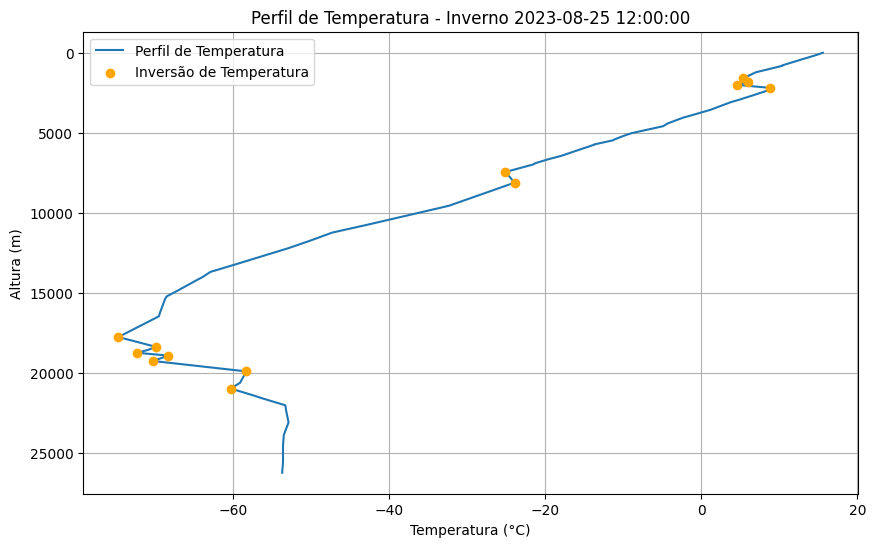

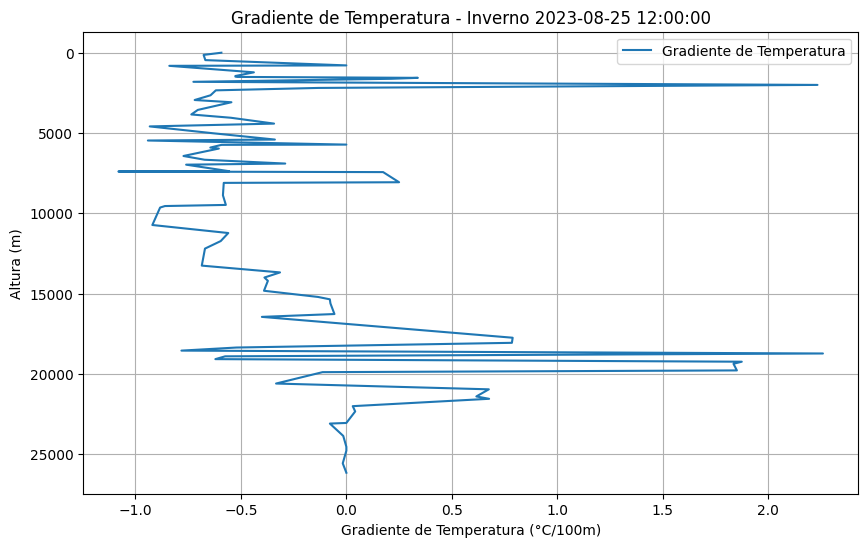


Analisando dados para 2023-07-03 00:00:00 (Inverno)

Inversões de temperatura em 2023-07-03 00:00:00: [(63, 18.8), (2486, 2.4), (2836, 5.8), (4633, -6.1), (4756, -4.9), (14256, -68.1), (14469, -66.7), (15251, -70.3), (16929, -65.7), (18985, -61.3), (19325, -62.7), (20027, -57.5), (20425, -59.7)]


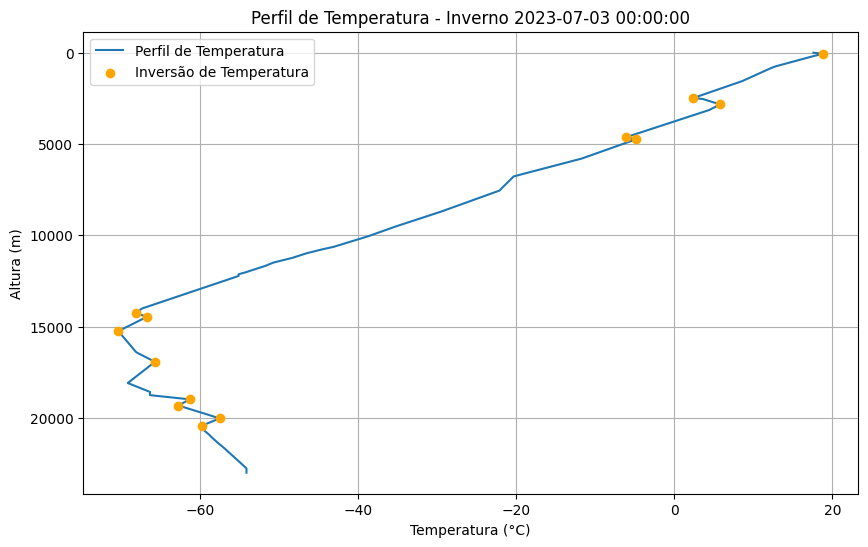

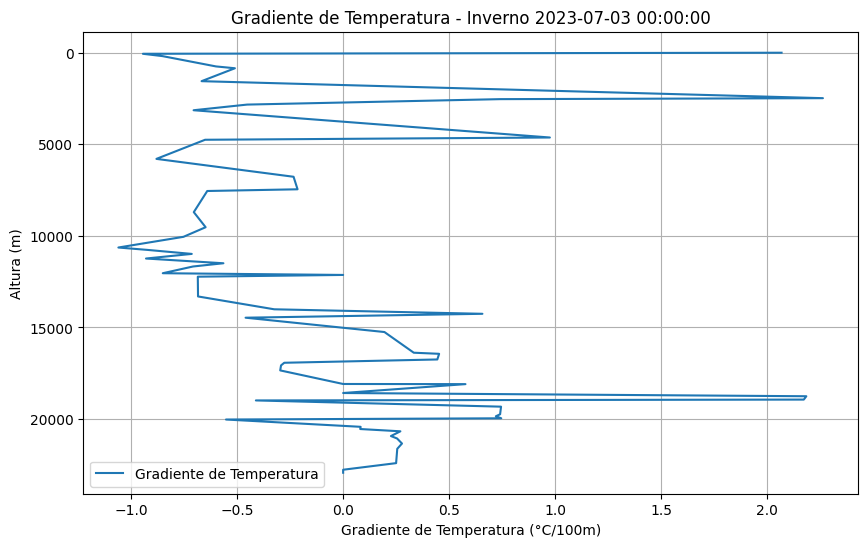


Analisando dados para 2023-07-03 12:00:00 (Inverno)

Inversões de temperatura em 2023-07-03 12:00:00: [(55, 17.0), (2183, 4.4), (2287, 5.4), (2392, 5.2), (13930, -67.5), (14301, -63.1), (16284, -70.9), (17307, -70.7), (17668, -67.5), (18109, -69.3), (18478, -64.7), (22459, -53.7), (23920, -54.7)]


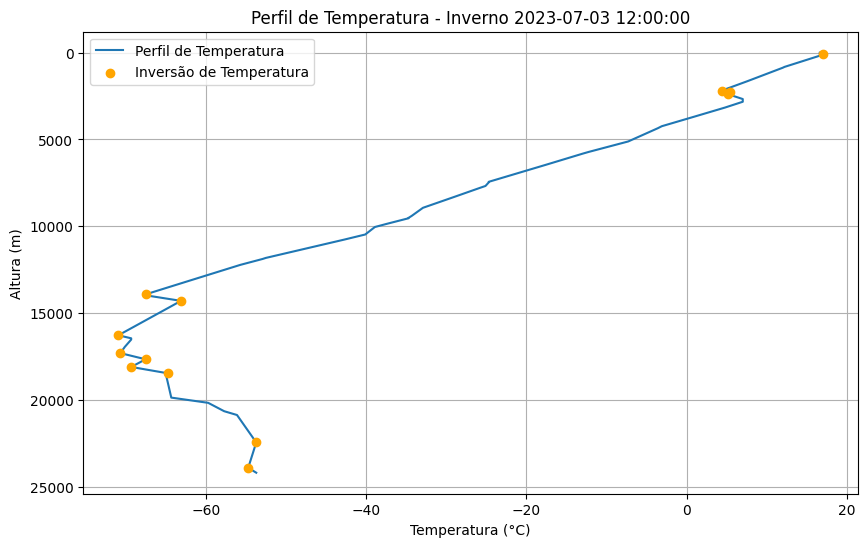

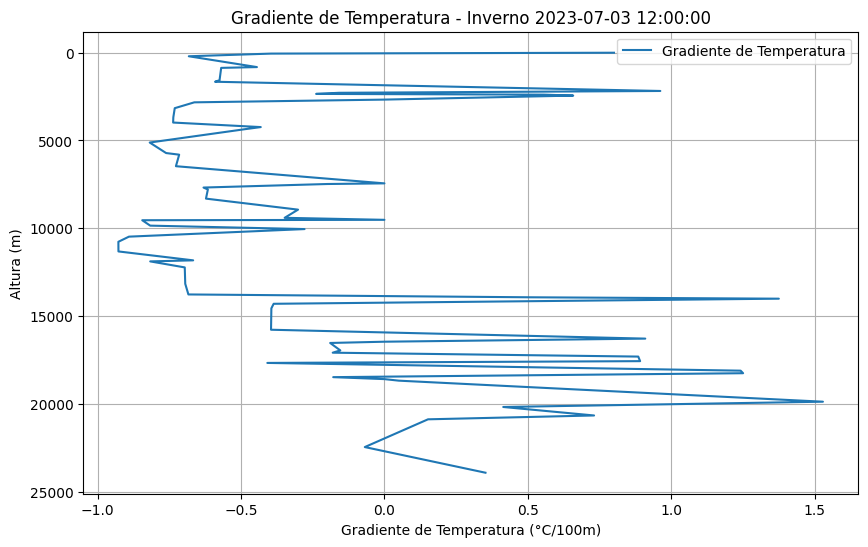


Analisando dados para 2023-06-27 00:00:00 (Inverno)

Inversões de temperatura em 2023-06-27 00:00:00: [(15909, -70.5), (17312, -72.5), (23100, -55.9), (23824, -56.9)]


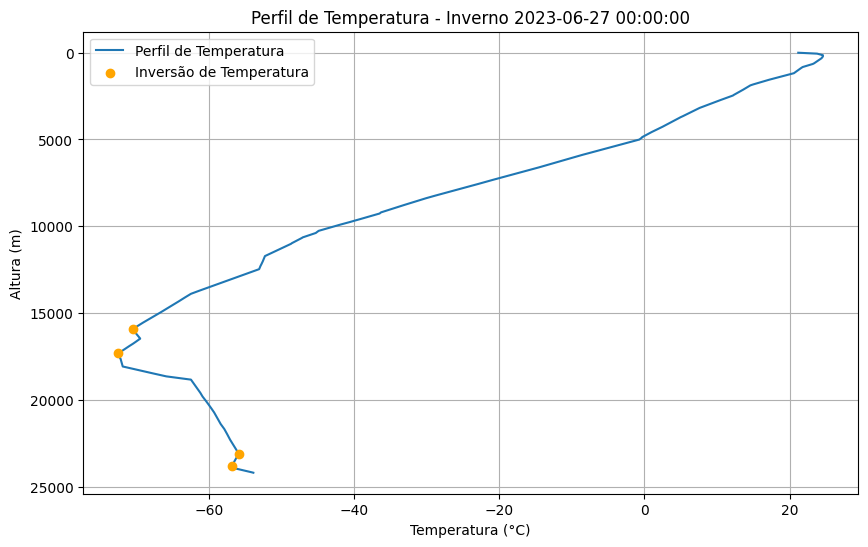

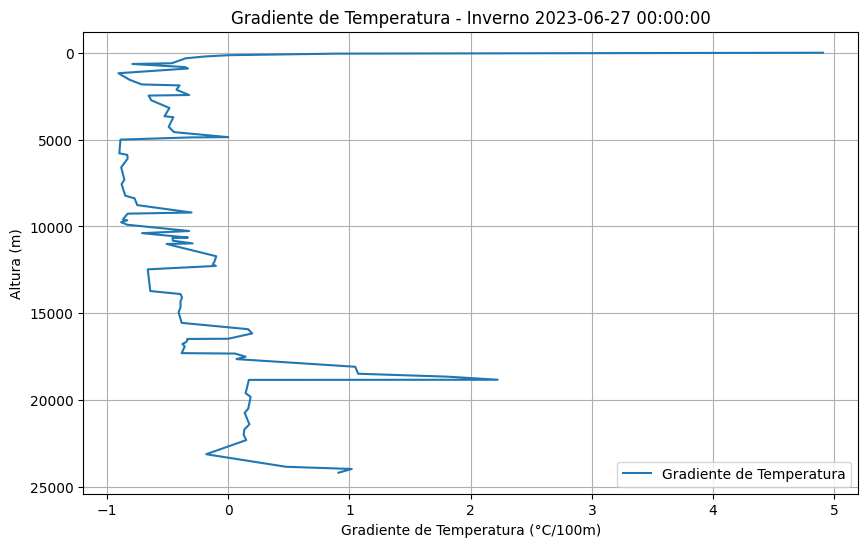


Analisando dados para 2023-06-27 12:00:00 (Inverno)

Inversões de temperatura em 2023-06-27 12:00:00: [(295, 24.0), (927, 21.4), (3637, 5.2), (3836, 5.4), (11736, -55.3), (12039, -53.5), (15463, -71.7), (15985, -67.5), (17573, -74.7), (19149, -61.5), (22232, -54.3), (24378, -56.9)]


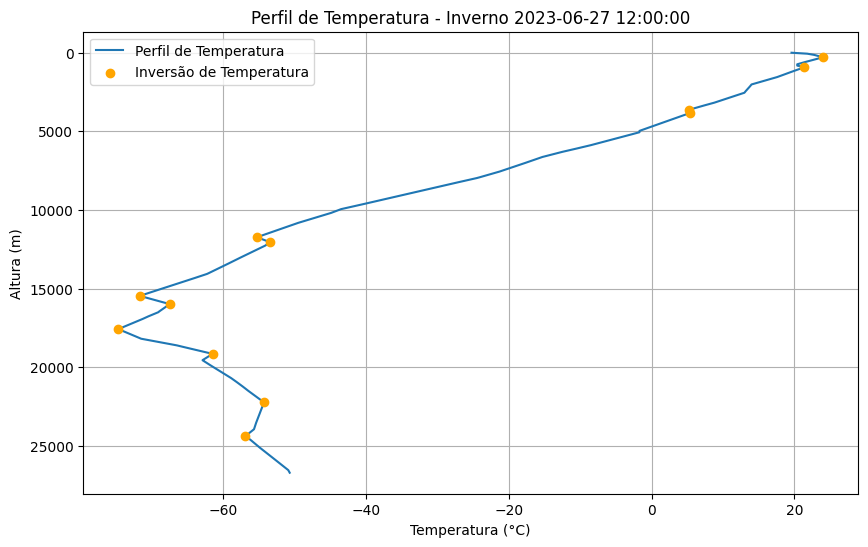

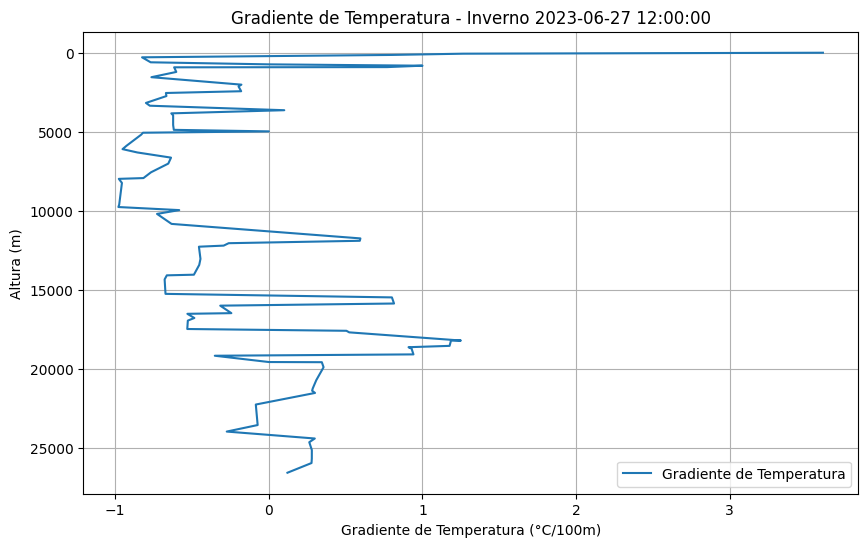

In [102]:
# Função para identificar os pontos de inversão de temperatura
def identify_inversions(df):
    temp = df['temperature'].values
    alt = df['height'].values
    pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
    
    inversions = [(alt[i], temp[i]) for i in pontos_inversao if 
                  (temp[i] > temp[i - 1] and temp[i] > temp[i + 1]) or 
                  (temp[i] < temp[i - 1] and temp[i] < temp[i + 1])]
    
    return inversions

# Função para plotar o perfil de temperatura
def plot_temperature_profile(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['temperature'], df['height'], label='Perfil de Temperatura')
    inversions = identify_inversions(df)
    label_added = False
    for inversion in inversions:
        if not label_added:
            plt.scatter(inversion[1], inversion[0], color='orange', label='Inversão de Temperatura', zorder=5)
            label_added = True
        else:
            plt.scatter(inversion[1], inversion[0], color='orange', zorder=5)
    plt.gca().invert_yaxis()
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Altura (m)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para plotar o gradiente de temperatura
def plot_temperature_gradient(df, title):
    deltaT = np.diff(df['temperature'])
    deltaZ = np.diff(df['height'])
    dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m
    plt.figure(figsize=(10, 6))
    plt.plot(dTdZ, df['height'][:-1], label='Gradiente de Temperatura')
    plt.gca().invert_yaxis()
    plt.xlabel('Gradiente de Temperatura (°C/100m)')
    plt.ylabel('Altura (m)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Analisando e plotando os dados de verão
for datetime_obj, df in summer_data.items():
    print(f"\nAnalisando dados para {datetime_obj} (Verão)\n")
    inversions = identify_inversions(df)
    print(f"Inversões de temperatura em {datetime_obj}: {inversions}")
    plot_temperature_profile(df, f"Perfil de Temperatura - Verão {datetime_obj}")
    plot_temperature_gradient(df, f"Gradiente de Temperatura - Verão {datetime_obj}")

# Analisando e plotando os dados de inverno
for datetime_obj, df in winter_data.items():
    print(f"\nAnalisando dados para {datetime_obj} (Inverno)\n")
    inversions = identify_inversions(df)
    print(f"Inversões de temperatura em {datetime_obj}: {inversions}")
    plot_temperature_profile(df, f"Perfil de Temperatura - Inverno {datetime_obj}")
    plot_temperature_gradient(df, f"Gradiente de Temperatura - Inverno {datetime_obj}")

In [85]:
# Calculando a altura da camada limite para cada data
boundary_layer_heights_summer = {date: calculate_boundary_layer_height(df) for date, df in summer_data.items()}
boundary_layer_heights_winter = {date: calculate_boundary_layer_height(df) for date, df in winter_data.items()}

print("\nAlturas da camada limite no Verão:")
for date, height in boundary_layer_heights_summer.items():
    print(f"{date}: {height} m")

print("\nAlturas da camada limite no Inverno:")
for date, height in boundary_layer_heights_winter.items():
    print(f"{date}: {height} m")


Alturas da camada limite no Verão:
2024-03-16 00:00:00: 260.0 m
2024-03-16 12:00:00: 994 m
2024-02-23 00:00:00: 5101.0 m
2024-02-25 12:00:00: 5747 m
2024-03-05 00:00:00: 18147 m
2024-03-05 12:00:00: 1655.0 m
2024-01-13 00:00:00: 2085 m
2024-01-15 12:00:00: 499.0 m
2024-01-01 00:00:00: 2402 m
2024-01-01 12:00:00: 17465.0 m

Alturas da camada limite no Inverno:
2023-08-20 00:00:00: 2184 m
2023-08-20 12:00:00: 1444 m
2023-08-21 00:00:00: 58 m
2023-08-21 12:00:00: 481.0 m
2023-08-25 00:00:00: 135.0 m
2023-08-25 12:00:00: 1816 m
2023-07-03 00:00:00: 63 m
2023-07-03 12:00:00: 55 m
2023-06-27 00:00:00: 23100 m
2023-06-27 12:00:00: 295 m


# Análise de dados no espaço

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


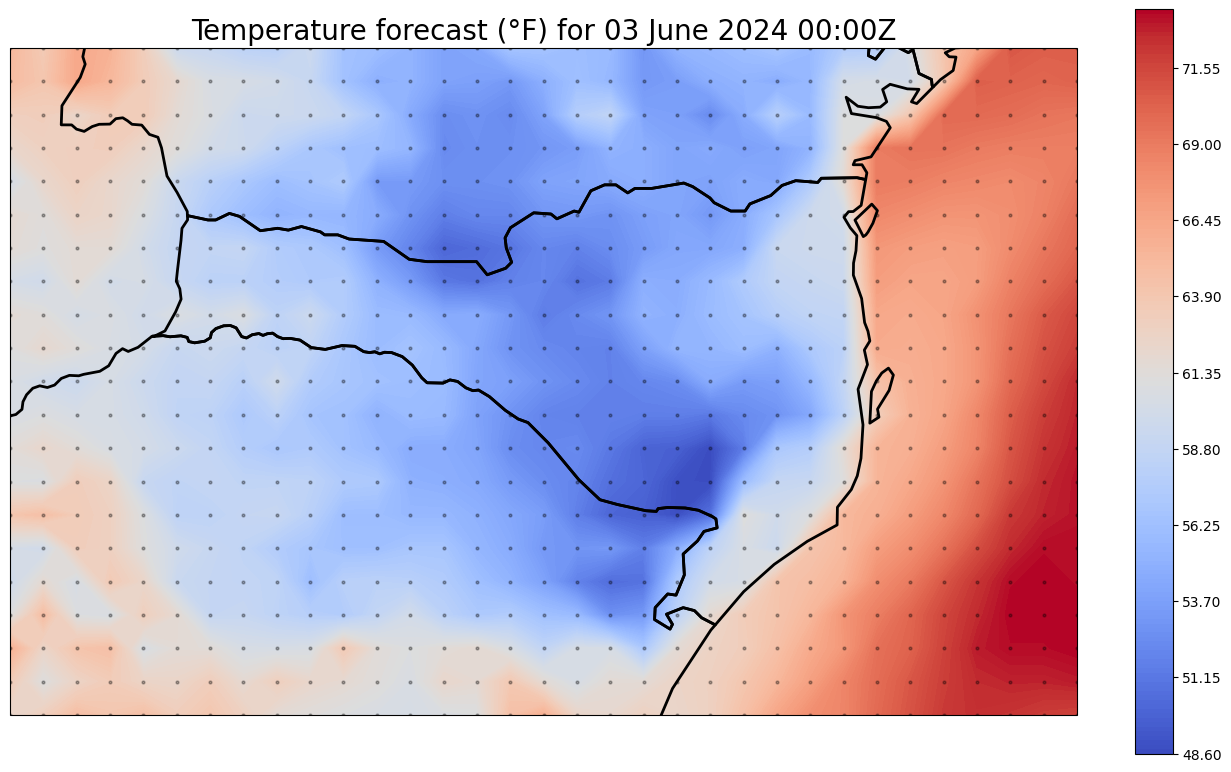

In [87]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-30, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55, -47, -30, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')
